In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
crypto_news = pd.read_csv('drive/MyDrive/NLP/lab_one/cryptonews.csv')
print(crypto_news['sentiment'][0])

{'class': 'negative', 'polarity': -0.1, 'subjectivity': 0.6}


In [3]:
crypto_news.head()

,date,sentiment,source,subject,text,title,url
0,2023-12-19 06:40:41,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...
1,2023-12-19 06:03:24,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...
2,2023-12-19 05:55:14,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...
3,2023-12-19 05:35:26,"{'class': 'positive', 'polarity': 0.5, 'subjec...",CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...
4,2023-12-19 05:31:08,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...


Датасет, помимо необходимой информации (sentiment class, text, title), содержит информацию об источнике, типе криптовалюты и url. Sentiment содержит дополнительные значения polarity, subjectivity. Все перечисленное не понадобится

In [38]:
def preprocess_target(x):

	return str.lstrip(x[10:].split(', ')[0])

relevant_data = crypto_news[['sentiment', 'text', 'title']]
relevant_data['sentiment'] = relevant_data['sentiment'].apply(preprocess_target)

relevant_data_crude = relevant_data.copy()

In [5]:
relevant_data.head()

,sentiment,text,title
0,'negative',Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...
1,'neutral',"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...
2,'positive',According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...
3,'positive',Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...
4,'neutral',A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...


<Axes: xlabel='sentiment', ylabel='count'>

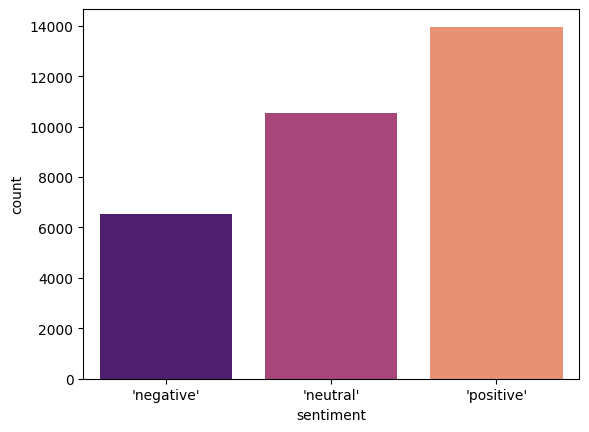

In [48]:
import seaborn as sns

sns.countplot(relevant_data, x="sentiment", palette="magma")

In [10]:
def words_stat(sent):

  for word in sent.split():
    words[word] = words.get(word, 0) + 1

words = {}
relevant_data['text'].apply(lambda x: words_stat(x))
sorted_words = sorted(words, key=words.get, reverse=True)
print('Топ слов:')
print(sorted_words)

['crypto', 'bitcoin', 'price', 'new', 'market', 'digital', 'cryptocurrency', 'could', 'btc', 'million', 'ethereum', 'trading', 'blockchain', 'exchange', 'usd', 'said', 'nft', 'investors', 'us', 'past', 'users', 'recent', 'one', 'financial', 'may', 'asset', 'ceo', 'bank', 'last', 'according', 'binance', 'assets', 'ftx', 'token', 'major', 'first', 'get', 'firm', 'despite', 'data', 'web3', 'u.s.', 'platform', 'support', 'network', 'latest', 'tokens', 'still', 'since', 'traders', 'two', 'defi', 'decentralized', 'mining', 'announced', 'company', 'following', 'industry', 'sec', 'investment', 'billion', 'worth', 'potential', 'also', 'next', '24', 'back', 'set', 'funds', 'use', 'launch', 'around', 'news.', 'blockchain-related', 'digest', 'eth', 'daily,', 'bite-sized', 'cryptoasset', 'central', 'time', 'nfts', 'says', 'would', 'global', 'regulatory', 'largest', 'top', 'markets', 'coinbase', 'key', 'coin', 'continues', 'exchanges', 'bullish', 'many', 'cryptocurrencies', 'south', "bitcoin's", 'li

Рассмотрим наиболее часто встречающиеся слова. В топе находится много предлогов, их вместе с другими стоп-словами необходимо удалить.

In [39]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

def remove_stop_words(sent):

  relevant_words = [x.lower() for x in sent.split() if x.lower() not in stop]
  return " ".join(relevant_words)

relevant_data['text'] = relevant_data['text'].apply(remove_stop_words)
relevant_data['title'] = relevant_data['title'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
words = {}
relevant_data['text'].apply(lambda x: words_stat(x))
sorted_words = sorted(words, key=words.get, reverse=True)
print('Топ слов после обработки:')
print(sorted_words)

non_alphas = []

for word in sorted_words:
  if len(non_alphas) > 100: break
  if not word.isalpha(): non_alphas.append(word)

print('Топ слов, содержащих что-то помимо букв:')
print(non_alphas)

Топ слов после обработки:
['crypto', 'bitcoin', 'price', 'new', 'market', 'digital', 'cryptocurrency', 'could', 'btc', 'million', 'ethereum', 'trading', 'blockchain', 'exchange', 'usd', 'said', 'nft', 'investors', 'us', 'past', 'users', 'recent', 'one', 'financial', 'may', 'asset', 'ceo', 'bank', 'last', 'according', 'binance', 'assets', 'ftx', 'token', 'major', 'first', 'get', 'firm', 'despite', 'data', 'web3', 'u.s.', 'platform', 'support', 'network', 'latest', 'tokens', 'still', 'since', 'traders', 'two', 'defi', 'decentralized', 'mining', 'announced', 'company', 'following', 'industry', 'sec', 'investment', 'billion', 'worth', 'potential', 'also', 'next', '24', 'back', 'set', 'funds', 'use', 'launch', 'around', 'news.', 'blockchain-related', 'digest', 'eth', 'daily,', 'bite-sized', 'cryptoasset', 'central', 'time', 'nfts', 'says', 'would', 'global', 'regulatory', 'largest', 'top', 'markets', 'coinbase', 'key', 'coin', 'continues', 'exchanges', 'bullish', 'many', 'cryptocurrencies',

Удалим знаки препинания с конца слов

In [40]:
def remove_symbols(sent):
  """
  Удаление ненужных знаков с конца слов
  """

  sent_words = sent.split()
  new_words = [word[:-1] if word[-1] in ['.', ',', ':', ';', '!', '?', '$'] else word for word in sent_words]

  return " ".join(new_words)

relevant_data['text'] = relevant_data['text'].apply(remove_symbols)
relevant_data['title'] = relevant_data['title'].apply(remove_symbols)

In [32]:
words = {}
relevant_data['text'].apply(lambda x: words_stat(x))
sorted_words = sorted(words, key=words.get, reverse=True)

non_alphas = []

for word in sorted_words:
  if len(non_alphas) > 100: break
  if not word.isalpha(): non_alphas.append(word)

print('Новый топ слов, содержащих что-то помимо букв:')
print(non_alphas)

Топ слов после обработки:
['crypto', 'bitcoin', 'price', 'market', 'new', 'cryptocurrency', 'digital', 'million', 'btc', 'could', 'exchange', 'ethereum', 'blockchain', 'trading', 'said', 'investors', 'usd', 'us', 'assets', 'nft', 'users', 'past', 'bank', 'one', 'binance', 'ceo', 'may', 'asset', 'recent', 'ftx', 'platform', 'week', 'financial', 'network', 'token', 'industry', 'last', 'year', 'according', 'tokens', 'news', 'data', 'support', 'firm', 'web3', 'first', 'latest', 'billion', 'major', 'get', 'company', 'u.s', 'defi', 'despite', 'traders', 'sec', 'funds', 'daily', 'nfts', 'hours', 'mining', 'cryptocurrencies', 'markets', 'decentralized', 'since', 'still', 'two', 'eth', 'exchanges', 'investment', 'launch', 'next', 'announced', 'following', 'level', 'potential', 'time', 'back', 'worth', 'report', '24', 'also', 'coinbase', '2022', 'use', 'says', 'today', 'coin', 'around', 'set', 'bullish', 'services', 'digest', 'blockchain-related', 'cryptoasset', 'continues', 'etf', 'bite-sized',

Наконец, стоит удалить числа вроде 2022, 24 и провести лемматизацию

In [42]:
import nltk
nltk.download('wordnet')

import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
pattern = re.compile("\$?\d+%?")

def lemm_no_num(sent):
  """
  Лемматизация и удаление чисел
  """
  sent_words = sent.split()
  new_words = [lemmatizer.lemmatize(word) for word in sent_words if not pattern.match(word)]

  return " ".join(new_words)

relevant_data['text'] = relevant_data['text'].apply(lemm_no_num)
relevant_data['title'] = relevant_data['title'].apply(lemm_no_num)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [43]:
words = {}
relevant_data['text'].apply(lambda x: words_stat(x))
sorted_words = sorted(words, key=words.get, reverse=True)

non_alphas = []

for word in sorted_words:
  if len(non_alphas) > 100: break
  if not word.isalpha(): non_alphas.append(word)

print('Новый топ слов, содержащих что-то помимо букв:')
print(non_alphas)

Новый топ слов, содержащих что-то помимо букв:
['web3', 'u.s', 'blockchain-related', 'bite-sized', "bitcoin's", '-', '\\x93', '(btc)', 'co-founder', '—', 'on-chain', 'bankman-fried', "world's", "here's", 'bitcoin’s', '–', 'all-time', 'long-term', 'short-term', 'week’s', '(eth)', 'it’s', '(sec)', 'non-fungible', 'blockchain-based', 'pair-related', "ethereum's", "company's", 'layer-2', "nation's", 'cointelegraph’s', "ftx's", 'exchange-traded', "sec's", 'world’s', 'cross-chain', 'crypto-related', "country's", '(cbdc)', 'proof-of-stake', "binance's", 'cross-border', "ripple's", 'play-to-earn', '(defi)', 'btc’s', "'the", '&', '“the', 'real-world', 'ethereum’s', "exchange's", "korea's", 'today.have', 'sell-off', 'and/or..', '(shib)', 'sec’s', 'binance.us', 'near-term', "coinbase's", "today's", '(lunc)', 'binance’s', '(nfts)', 'q2', "china's", 'crypto-friendly', "week's", "russia's", '(etf)', "musk's", 'crypto.com', "firm's", 'second-largest', 'double-digit', "network's", 'long-awaited', 'doe

In [51]:
offset = 20
for i in range(5):
  print(relevant_data['title'][offset+i])
  print(relevant_data['text'][offset+i])
  print(relevant_data['sentiment'][offset+i], '\n')

metaverse firm improbable offloads gaming subsidiary keywords million
metaverse startup improbable sold gaming subsidiary mpg irish video game company keywords studio million
'negative' 

price analysis spx dxy btc eth bnb xrp sol ada avax doge
bitcoin may remain pressure day collapse unlikely trader expected buy dip anticipation spot bitcoin etf
'negative' 

biggest crypto gainer today uniswap – metis inj ox
blue-chip cryptocurrencies continue pull lower multi-month/year high hit earlier month amid profit-taking ahead expected somewhat calmer lower volume run end year major market participant take time christmas holiday low cap market continue pump biggest gainer uniswap
'negative' 

bitwise launch crypto etf medium campaign ‘the interesting man world’
ad spot came u.s security exchange commission looking multiple spot crypto exchange-traded fund application asset manager
'neutral' 

bitcoin price prediction vaneck’s ceo say btc hit all-time high within month – time buy
bitcoin (btc) 

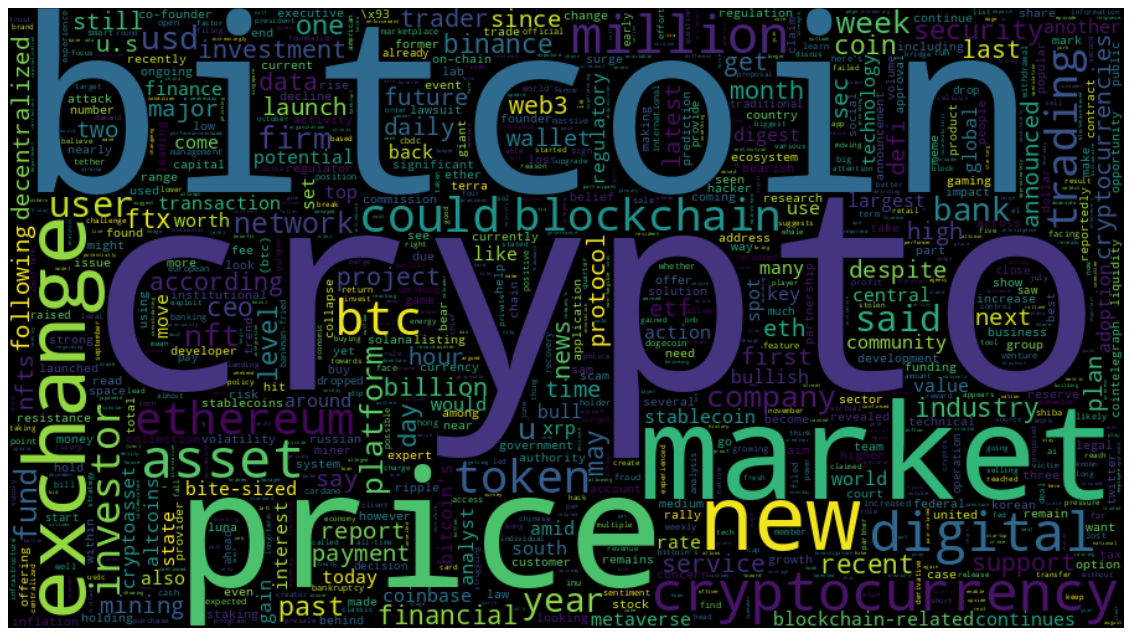

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=900, height=500, max_words=1628, relative_scaling=1, normalize_plurals=False).generate_from_frequencies(words)

plt.figure(figsize=(18, 16), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

relevant_data['all_text'] = relevant_data['text'] + relevant_data['title']

v = TfidfVectorizer()
X = v.fit_transform(relevant_data['all_text'])

encoder = LabelEncoder()
encoder.fit(relevant_data['sentiment'])
y = encoder.transform(relevant_data['sentiment'])

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [55]:
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f1)

KeyboardInterrupt: 